In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight

/home/parmeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/parmeet/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

def normalize_image(ima):
    return (ima - np.min(ima))/(np.max(ima) - np.min(ima))

In [3]:
# def add_brightness(image):
#     image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
#     image_HLS = np.array(image_HLS, dtype = np.float64) 
#     random_brightness_coefficient = np.random.uniform()+0.5 ## generates value between 0.5 and 1.5
#     image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient ## scale pixel values up or down for channel 1(Lightness)
#     image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255
#     image_HLS = np.array(image_HLS, dtype = np.uint8)
#     image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB
#     return image_RGB

In [4]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=True,weights='imagenet')
# We'll extract features at the final pool layer.
model = Model(
    inputs=cnn_base.input,
    outputs=cnn_base.get_layer('fc2').output
)
def extract_image(image_path,model):
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        return x
def vgg_model(x):
    features = model.predict(x)
    return features

In [5]:
labels = []
image_features = []

labels_test = []
image_features_test = []

images = []
image_count = 0
for idx,label in enumerate(os.listdir("images")):
    listdir = np.array(os.listdir("images/"+label))
    print(label,len(listdir))
    batch_sz = 100
    features = []
    labs = []
    label_batches = []
    
    labs_test = []
    label_batches_test = []
    count = 0
    for file in listdir:
        try:
            path = "images/"+label+'/'+file
            features.append(np.array(extract_image(path,model)[0]))
        except:
            count = count + 1
    print("Count is",count)
    temp_features = np.array(features)
    print(temp_features.shape)
    print("Done processing features")
    for i in range(int(len(listdir)/batch_sz)):
        X_features = temp_features[i*batch_sz:i*batch_sz+batch_sz]
        X_train, X_test, _, _ = train_test_split(X_features,np.ones(batch_sz,dtype='int'),test_size=0.1,random_state=1000)
        for aug_image in X_train:
            aug_image = preprocess_input(aug_image)
            transformed_features = vgg_model(np.expand_dims(aug_image, axis=0))
            label_batches.append(transformed_features)
            labs.append(label)
        for aug_image in X_test:
            images.append(aug_image)
            aug_image = preprocess_input(aug_image)
            transformed_features = vgg_model(np.expand_dims(aug_image, axis=0))
            label_batches_test.append(transformed_features)
            labs_test.append(label)
        
    image_features = image_features + label_batches
    labels = labels + labs

    image_features_test = image_features_test + label_batches_test
    labels_test = labels_test + labs_test
    print(len(image_features_test))
    print(len(images))

cod caught 717
Count is 0
(717, 224, 224, 3)
Done processing features
70
70
out of water halibut 611
Count is 2
(609, 224, 224, 3)
Done processing features
130
130
kusk fish 351


/home/parmeet/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Count is 0
(351, 224, 224, 3)
Done processing features
160
160
fresh caught jonah crab 420
Count is 0
(420, 224, 224, 3)
Done processing features
200
200
caught lobster 573
Count is 0
(573, 224, 224, 3)
Done processing features
250
250


In [6]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(labels),labels)

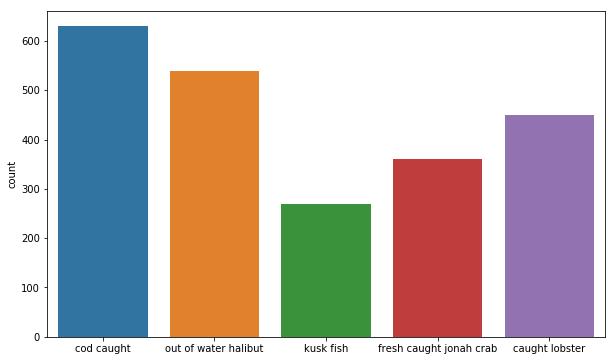

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(labels)

In [8]:
num_labels = len(np.unique(labels))
image_f = np.squeeze(np.array(image_features),axis=1)
image_f_test = np.squeeze(np.array(image_features_test),axis=1)
num_of_train_examples = image_f.shape
print(num_of_train_examples)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(labels)+list(labels_test))
#le.fit(list(labels))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
#one.fit(list(le_labels.reshape(-1,1)))
one.fit(list(le_labels.reshape(-1,1))+list(le_labels_test.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

(2250, 4096)


In [9]:
image_input = Input(shape=(4096,))
img_input = BatchNormalization()(image_input)
img_input = Dense(2048,activation='softmax')(img_input)
img_input = BatchNormalization()(image_input)
output = Dense(num_labels,activation='softmax')(img_input)
model_dense = Model(image_input, output)
model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_dense.save_weights('vgg.hd5')

In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=1000)
test_cvscores = []
validation_cvscores = []
for train, test in kf.split(image_f):
    model_dense.load_weights('vgg.hd5')
    hist = model_dense.fit(image_f[train], one_labels[train], epochs=10, verbose=1,class_weight=class_weights)
    print(hist.history['loss'])
    validation_score = model_dense.evaluate(image_f[test], one_labels[test], verbose=0)
    test_score = model_dense.evaluate(image_f_test, one_labels_test, verbose=0)
    predictions = model_dense.predict(image_f_test, verbose=0)
    pred_labels = np.argmax(predictions,axis=1)
    predicted_labels = le.inverse_transform(pred_labels)
    test_cvscores.append(test_score)
    validation_cvscores.append(validation_score)

Epoch 1/10
1800/1800 [==============================] - 0s 129us/step - loss: 0.8716 - acc: 0.7139
Epoch 2/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.4034 - acc: 0.8544
Epoch 3/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.2466 - acc: 0.9072
Epoch 4/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.1886 - acc: 0.9333
Epoch 5/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.1364 - acc: 0.9561
Epoch 6/10
1800/1800 [==============================] - 0s 87us/step - loss: 0.1140 - acc: 0.9639
Epoch 7/10
1800/1800 [==============================] - 0s 89us/step - loss: 0.0968 - acc: 0.9667
Epoch 8/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.0725 - acc: 0.9800
Epoch 9/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.0749 - acc: 0.9756
Epoch 10/10
1800/1800 [==============================] - 0s 87us/step - loss: 0.0780 - acc: 0.9817
[0.871630490620931

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1800/1800 [==============================] - 0s 84us/step - loss: 0.3695 - acc: 0.8672
Epoch 3/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.2340 - acc: 0.9144
Epoch 4/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.1353 - acc: 0.9517
Epoch 5/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.1124 - acc: 0.9683
Epoch 6/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0889 - acc: 0.9756
Epoch 7/10
1800/1800 [==============================] - 0s 89us/step - loss: 0.0881 - acc: 0.9728
Epoch 8/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.0602 - acc: 0.9883
Epoch 9/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0670 - acc: 0.9850
Epoch 10/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0641 - acc: 0.9822
[0.9228925593694051, 0.3694726079040104, 0.23404352956347996, 0.1352503557668792, 0.11239309863911735, 0.08892834997839398, 0.08

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1800/1800 [==============================] - 0s 85us/step - loss: 0.3725 - acc: 0.8717
Epoch 3/10
1800/1800 [==============================] - 0s 83us/step - loss: 0.2090 - acc: 0.9183
Epoch 4/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.1275 - acc: 0.9550
Epoch 5/10
1800/1800 [==============================] - 0s 83us/step - loss: 0.0992 - acc: 0.9694
Epoch 6/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0899 - acc: 0.9717
Epoch 7/10
1800/1800 [==============================] - 0s 83us/step - loss: 0.0597 - acc: 0.9911
Epoch 8/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.0634 - acc: 0.9844
Epoch 9/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0430 - acc: 0.9922
Epoch 10/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0350 - acc: 0.9939
[0.9198805999755859, 0.3724915831618839, 0.20899589697519938, 0.1275390633278423, 0.09915371984243393, 0.08989941149950027, 0.05

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1800/1800 [==============================] - 0s 85us/step - loss: 0.3511 - acc: 0.8633
Epoch 3/10
1800/1800 [==============================] - 0s 83us/step - loss: 0.2278 - acc: 0.9122
Epoch 4/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.1184 - acc: 0.9600
Epoch 5/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0769 - acc: 0.9761
Epoch 6/10
1800/1800 [==============================] - 0s 83us/step - loss: 0.0620 - acc: 0.9861
Epoch 7/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0662 - acc: 0.9844
Epoch 8/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0610 - acc: 0.9822
Epoch 9/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0595 - acc: 0.9861
Epoch 10/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.0403 - acc: 0.9917
[0.9463311261600919, 0.35108840147654213, 0.22776376850075192, 0.1184261268377304, 0.07690137339962853, 0.06202534733547105, 0.0

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1800/1800 [==============================] - 0s 84us/step - loss: 0.3468 - acc: 0.8711
Epoch 3/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.2113 - acc: 0.9233
Epoch 4/10
1800/1800 [==============================] - 0s 86us/step - loss: 0.1033 - acc: 0.9683
Epoch 5/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0738 - acc: 0.9767
Epoch 6/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0685 - acc: 0.9817
Epoch 7/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0617 - acc: 0.9822
Epoch 8/10
1800/1800 [==============================] - 0s 85us/step - loss: 0.0703 - acc: 0.9794
Epoch 9/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0433 - acc: 0.9906
Epoch 10/10
1800/1800 [==============================] - 0s 84us/step - loss: 0.0381 - acc: 0.9922
[0.8626071704758538, 0.34680964721573726, 0.21127604107062023, 0.10326823314030965, 0.07383859564860662, 0.06845141059822506, 0.

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
print(np.mean(np.array(test_cvscores)[:,1]))
print(np.std(np.array(test_cvscores)[:,1]))

print(np.mean(np.array(validation_cvscores)[:,1]))
print(np.std(np.array(validation_cvscores)[:,1]))

0.8215999979972839
0.009666437347147587
0.7946666666666667
0.018887581654111803


In [21]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(np.array(test_cvscores)[:,1]*100)

[82.00 78.40 78.80 80.00 78.40]


In [22]:
#print("Validation Standard Deviation",np.std(validation_cvscores))
print("Test Standard Deviation",np.std(test_cvscores))

Test Standard Deviation 0.31310995300158423


In [13]:
test_score

[0.7332952129840851, 0.8239999976158142]

In [15]:
# f, axarr = plt.subplots(num_labels,2)
# f.set_figheight(30)
# f.set_figwidth(30)
# for i in range(num_labels):
#     axarr[i,0].imshow(mpimg.imread(images_to_show[i][0]))
#     axarr[i,0].title.set_text("train "+images_to_show[i][2])
#     axarr[i,1].imshow(mpimg.imread(images_to_show[i][1]))
#     axarr[i,1].title.set_text("test "+images_to_show[i][2])
# plt.show()
# plt.savefig('transferlearning.png')
# # import matplotlib.pyplot as plt
# # import matplotlib.image as mpimg
# # image = mpimg.imread(images[0])
# # plt.imshow(image)
# # plt.show()

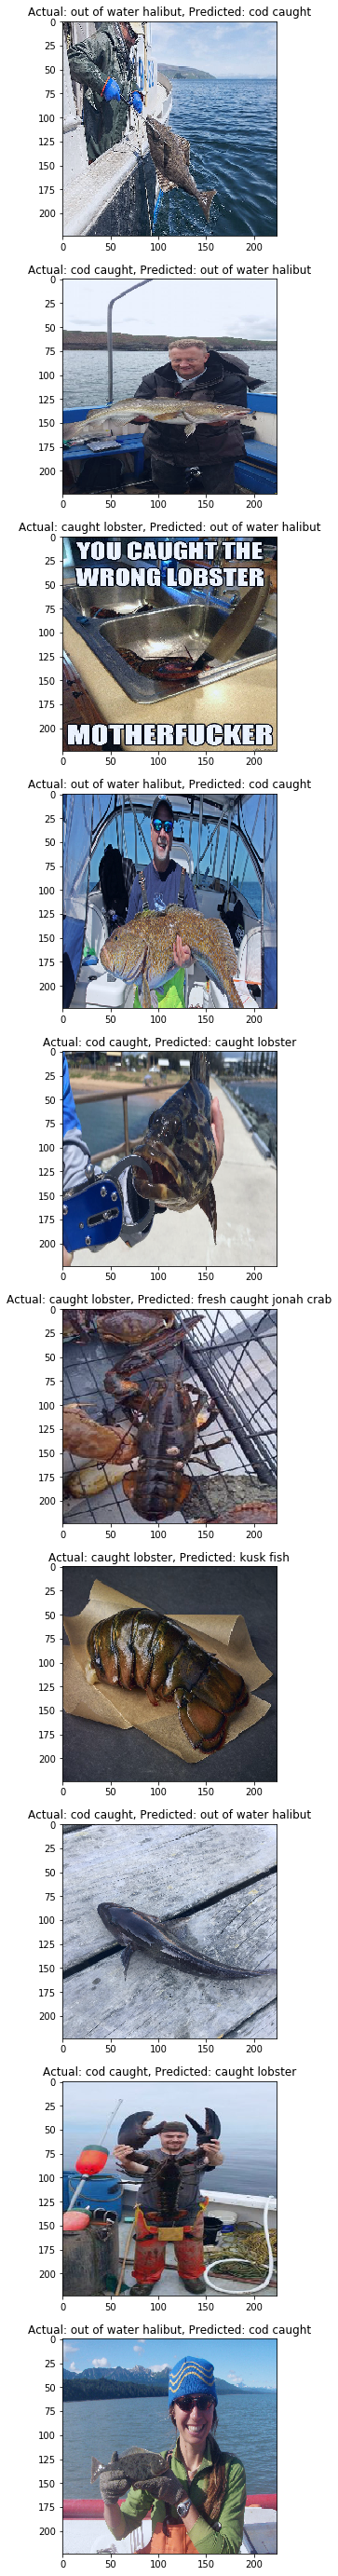

In [16]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)!=predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

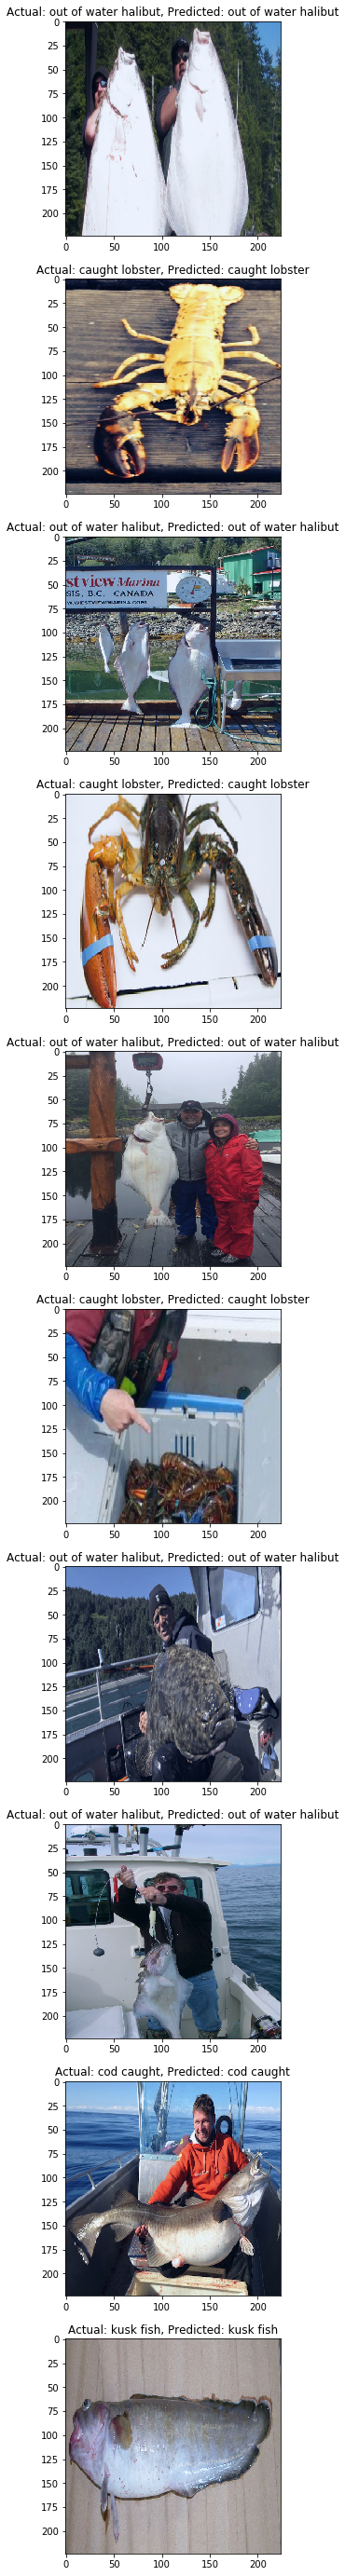

In [17]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)==predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [1]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, predicted_labels,labels=np.unique(labels_))
print(cm)

NameError: name 'labels_test' is not defined

In [ ]:
confusion_matrix(labels_test,predicted_labels)

labels_=list(np.unique(labels_test))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels_)
ax.set_yticklabels([''] + labels_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()